In [1]:
import matplotlib.pyplot as plt
import glob
import csv

In [2]:
def plot(labels, km_add, km_cat, gmm_add, gmm_cat, num, em):
    plt.figure(figsize=(20,7))
    plt.plot(labels, km_add, '-go', LineWidth=2, label="K-Means(Add)")
    plt.plot(labels, km_cat, '--r', LineWidth=2, label="K-Means(Cat)")
    plt.plot(labels, gmm_add, '-ys', LineWidth=2, label="GMM(Add)")
    plt.plot(labels, gmm_cat, '--b>', LineWidth=2, label="GMM(Cat)")
    #plt.title("Experimental Results: " + 
    #          (em.title() if em == 'purity' else em.upper()) + " Data " +
    #          ("R" if num == '34' else "C" + num), fontsize=30)
    plt.legend(loc="best", fontsize=20)
    #plt.xlabel('Data', fontsize=30)
    #plt.ylabel('Score', fontsize=30)
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylim([0.1, 0.7])
    plt.grid()
    #plt.savefig(("plot_result/Experimental_Results_" + 
    #          (em.title() if em == 'purity' else em.upper()) + "_Data_" +
    #          ("R" if num == '34' else "C") + num + ".png"),format='png',bbox_inches='tight',dpi=300)

In [3]:
weights = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
class_num = ["23", "34"]
evaluation_method = ["purity", "nmi", "ari"]

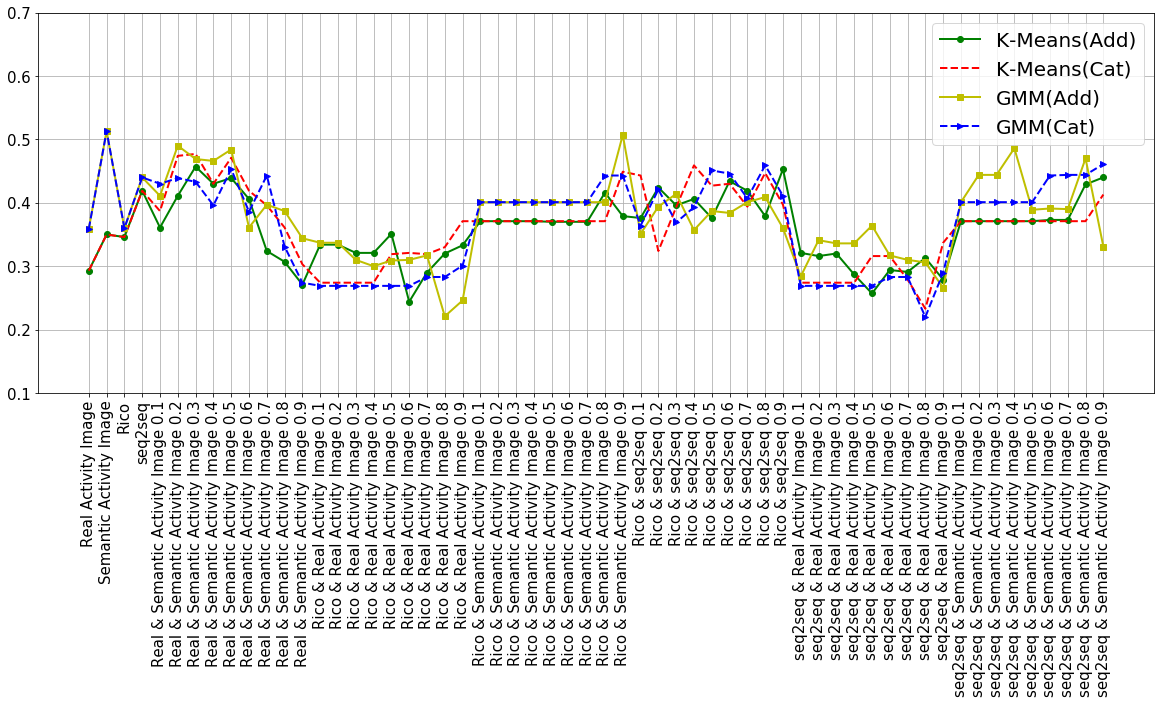

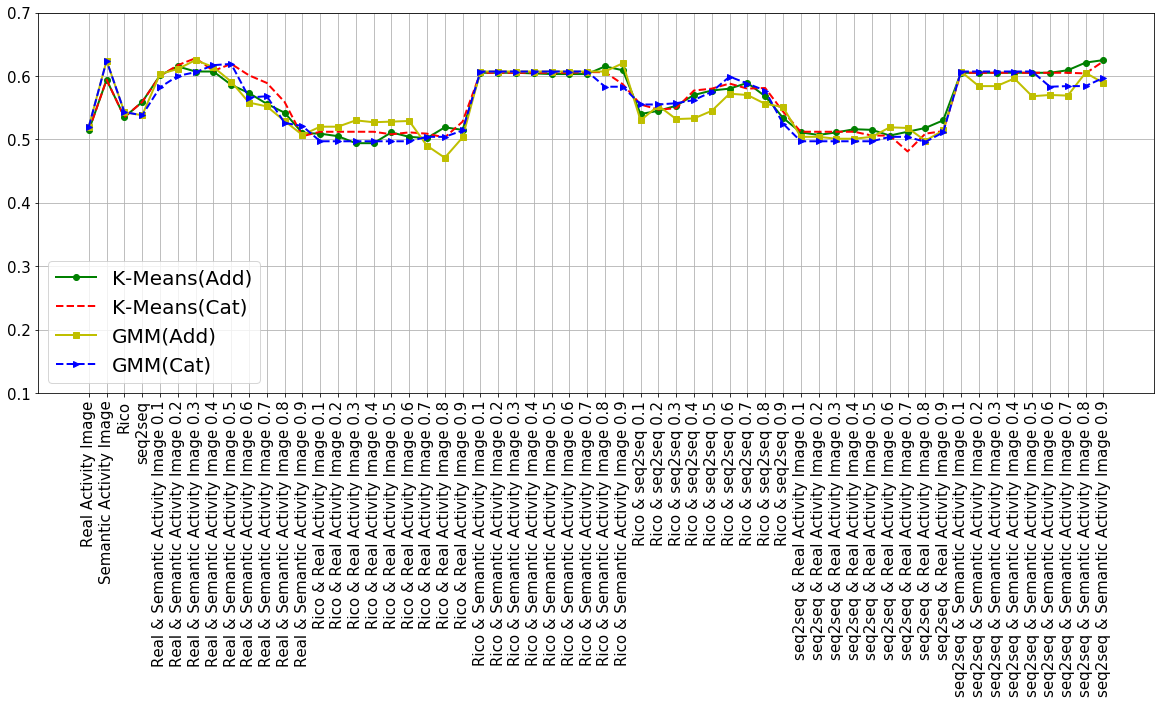

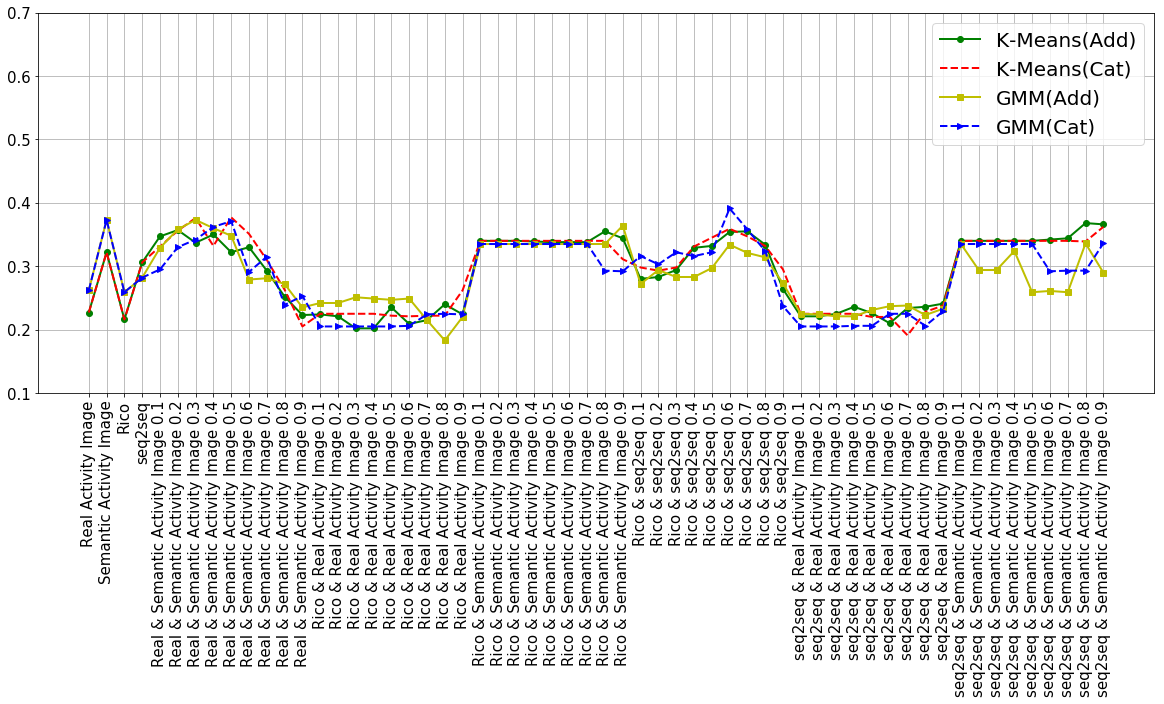

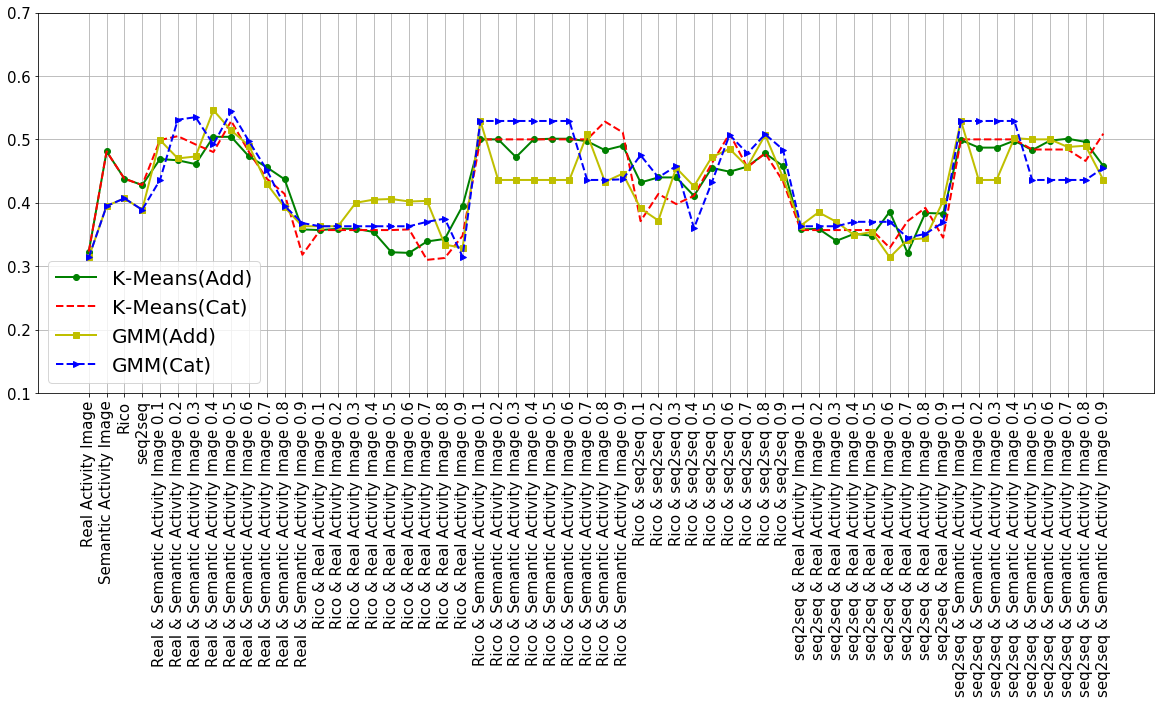

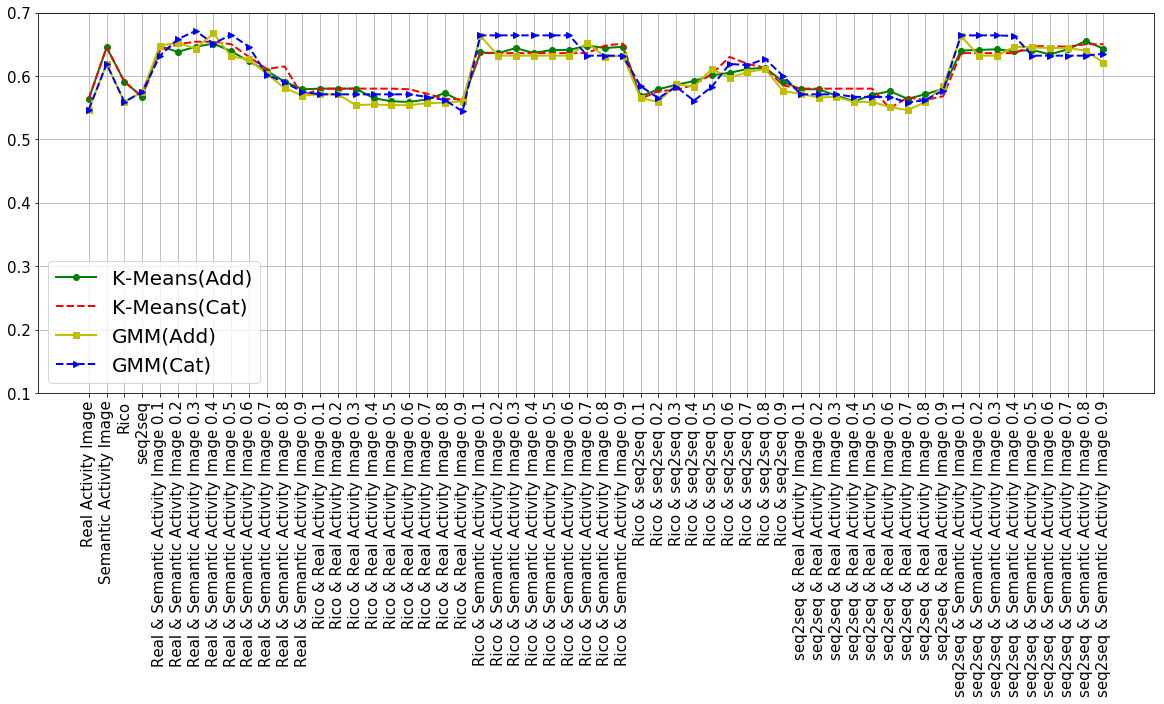

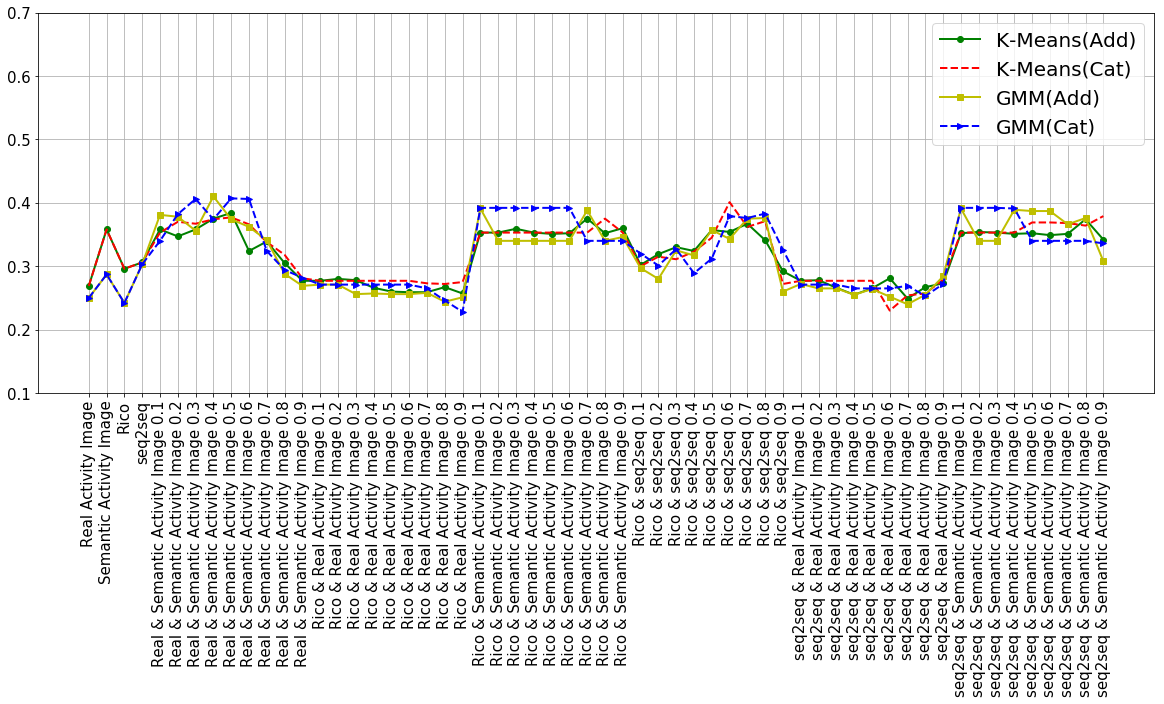

In [4]:
for num in class_num:
    for em in evaluation_method:
        uni = list()
        add = list()
        cat = list()
        for file in glob.glob("./csv/" + em + "/*"):
            if num in file:
                if "add" in file:
                    add.append(file)
                elif "cat" in file:
                    cat.append(file)
                else:
                    uni.append(file)

        uni.sort()
        add.sort()
        cat.sort()

        labels = list()
        km_add = list()
        km_cat = list()
        gmm_add = list()
        gmm_cat = list()
        for csvFile in uni:
            if 're' in csvFile:
                labels.append("Real Activity Image")
            elif 'seq2seq' in csvFile:
                labels.append("seq2seq")
            elif 'se' in csvFile:
                labels.append("Semantic Activity Image")
            elif 'rico' in csvFile:
                labels.append("Rico")
            with open(csvFile, 'r') as f:
                rdr = csv.DictReader(f)
                for i in rdr:
                    if em == 'purity':
                        if i['List'] == "Total":
                            km_add.append(float(i['kmeans'].split('%')[0])/100)
                            km_cat.append(float(i['kmeans'].split('%')[0])/100)
                            gmm_add.append(float(i['gaussian_mixture'].split('%')[0])/100)
                            gmm_cat.append(float(i['gaussian_mixture'].split('%')[0])/100)
                    else:
                        km_add.append(float(i['kmeans']))
                        km_cat.append(float(i['kmeans']))
                        gmm_add.append(float(i['gaussian_mixture']))
                        gmm_cat.append(float(i['gaussian_mixture']))

        for csvFile in add:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels.append("Rico & seq2seq " + w)
                            is_w = True
                            break
                    if not is_w:
                        continue
                        #labels.append("Rico & seq2seq")
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels.append("Rico & Real Activity Image " + w)
                            is_w = True
                            break
                    if not is_w:
                        continue
                        #labels.append("Rico & Real Activity Image")
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels.append("Rico & Semantic Activity Image " + w)
                            is_w = True
                            break
                    if not is_w:
                        continue
                        #labels.append("Rico & Semantic Activity Image")
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels.append("seq2seq & Real Activity Image " + w)
                            is_w = True
                            break
                    if not is_w:
                        continue
                        #labels.append("seq2seq & Real Activity Image")
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels.append("seq2seq & Semantic Activity Image " + w)
                            is_w = True
                            break
                    if not is_w:
                        continue
                        #labels.append("seq2seq & Semantic Activity Image")
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        labels.append("Real & Semantic Activity Image " + w)
                        is_w = True
                        break
                if not is_w:
                    continue
                    #labels.append("Real & Semantic Activity Image")
            with open(csvFile, 'r') as f:
                rdr = csv.DictReader(f)
                for i in rdr:
                    if em == 'purity':
                        if i['List'] == "Total":
                            km_add.append(float(i['kmeans'].split('%')[0])/100)
                            gmm_add.append(float(i['gaussian_mixture'].split('%')[0])/100)
                    else:
                        km_add.append(float(i['kmeans']))
                        gmm_add.append(float(i['gaussian_mixture']))

        for csvFile in cat:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        is_w = True
                        break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                rdr = csv.DictReader(f)
                for i in rdr:
                    if em == 'purity':
                        if i['List'] == "Total":
                            km_cat.append(float(i['kmeans'].split('%')[0])/100)
                            gmm_cat.append(float(i['gaussian_mixture'].split('%')[0])/100)
                    else:
                        km_cat.append(float(i['kmeans']))
                        gmm_cat.append(float(i['gaussian_mixture']))
                  
        plot(labels, km_add, km_cat, gmm_add, gmm_cat, num, em)